In [28]:
import numpy as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [29]:
data_path = './datasets/flowers/'
x = []
y = []
for dir in os.listdir(data_path):
    for file in os.listdir(f'{data_path}{dir}/'):
        img = Image.open(f'{data_path}{dir}/{file}')
        img = img.resize((200, 200))
        x.append(np.array(img))
        y.append(dir)

In [30]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(4317, 200, 200, 3)
(4317,)


In [31]:
#creating string into labels
print(np.unique(y))

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [32]:
labels = {'daisy': int(0), 'dandelion': int(1), 'rose': int(2), 'sunflower': int(3), 'tulip': int(4)}
for i in range(len(y)):
    item = y[i]
    y[i] = int(labels[item])
    
print(np.unique(y))

['0' '1' '2' '3' '4']


In [33]:
y = np.array(list(map(int, y)))
print(type(y))

<class 'numpy.ndarray'>


In [34]:
print(type(y[0]))

<class 'numpy.int64'>


In [35]:
print(np.unique(y))

[0 1 2 3 4]


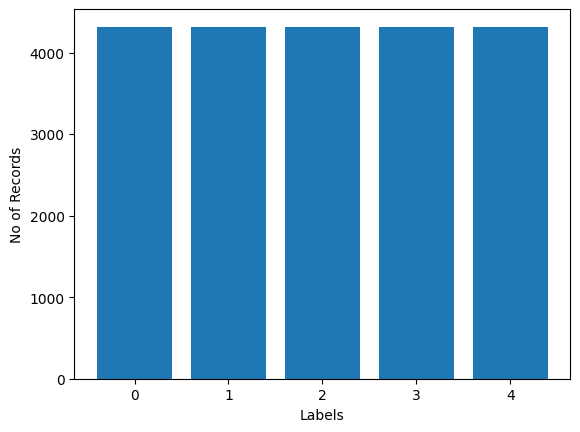

In [36]:
plt.bar(y, len(y))
plt.xlabel('Labels')
plt.ylabel('No of Records')
plt.show()

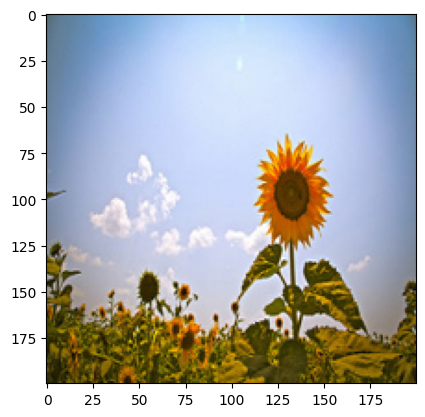

In [37]:
plt.imshow(x[10])
plt.show()

In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(filters=4, kernel_size=(3, 3), input_shape=(200, 200, 3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(5, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 4)       112       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 66, 66, 4)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 17424)             0         
                                                                 
 dense_1 (Dense)             (None, 5)                 87125     
                                                                 
Total params: 87,237
Trainable params: 87,237
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3237, 200, 200, 3)
(3237,)
(1080, 200, 200, 3)
(1080,)


In [44]:
history = model.fit(x, y, epochs=5)

Epoch 1/5
135/135 [==============================] - 21s 154ms/step - loss: 105.7168 - accuracy: 0.2726
Epoch 2/5
135/135 [==============================] - 20s 150ms/step - loss: 6.0988 - accuracy: 0.4033
Epoch 3/5
135/135 [==============================] - 20s 151ms/step - loss: 2.0801 - accuracy: 0.5914
Epoch 4/5
135/135 [==============================] - 20s 151ms/step - loss: 1.0561 - accuracy: 0.7197
Epoch 5/5
135/135 [==============================] - 20s 151ms/step - loss: 0.6927 - accuracy: 0.7952


In [47]:
loss,accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

34/34 [==============================] - 2s 68ms/step - loss: 0.4951 - accuracy: 0.8630
0.49508294463157654
0.8629629611968994


34/34 [==============================] - 3s 70ms/step


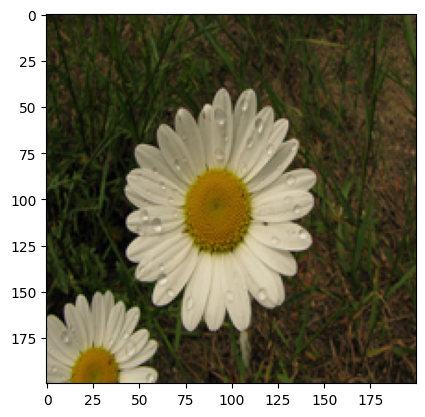

Predicted Value is: daisy
Actual Value is: daisy
34/34 [==============================] - 2s 70ms/step


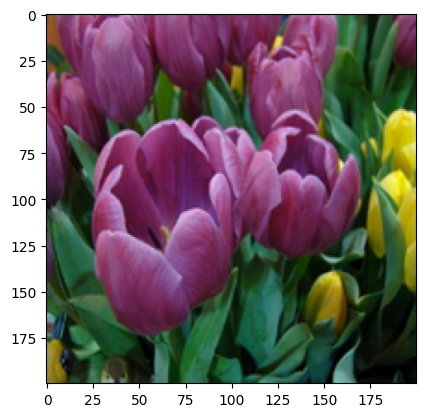

Predicted Value is: dandelion
Actual Value is: tulip
34/34 [==============================] - 2s 68ms/step


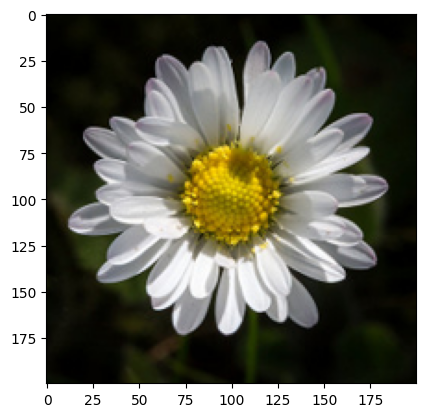

Predicted Value is: daisy
Actual Value is: daisy
34/34 [==============================] - 2s 69ms/step


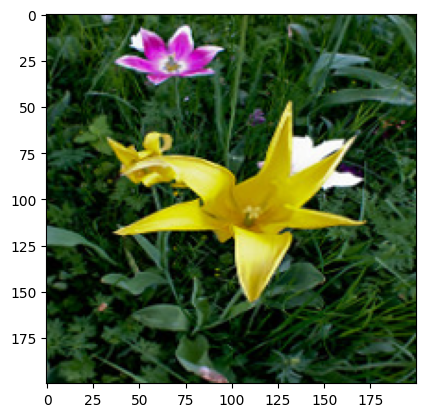

Predicted Value is: dandelion
Actual Value is: tulip
34/34 [==============================] - 2s 71ms/step


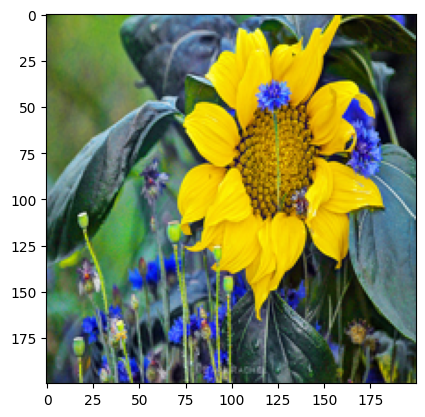

Predicted Value is: rose
Actual Value is: sunflower


In [48]:
import random
for i in range(5):
    n = random.randint(1, 1000)
    predictions = model.predict(x_test)
    plt.imshow(x_test[n])
    plt.show()
    predicted_value = np.argmax(predictions[n])
    for key in labels:
        if labels[key] == predicted_value:
            predicted_output = key
        if labels[key] == y_test[n]:
            actual_output = key
    print(f'Predicted Value is: {predicted_output}')
    print(f'Actual Value is: {actual_output}')

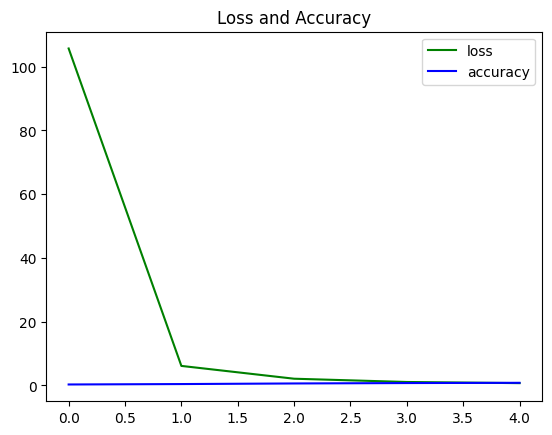

In [50]:
#plotting loss and accuracy
epochs = 5
loss = history.history['loss']
accuracy = history.history['accuracy']
plt.title("Loss and Accuracy")
plt.plot(loss, 'g', label='loss')
plt.plot(accuracy, 'b', label='accuracy')
plt.legend()
plt.show()